In [2]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings (action="ignore", module="scipy", message="^internal gelsd")

In [3]:
df = pd.read_csv(r"D:\Desktop\Titanic.csv")
df.head()

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [4]:
df.tail()

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
1308,1309,"Zakarian, Mr Artun",3rd,27.0,male,0,0
1309,1310,"Zakarian, Mr Maprieder",3rd,26.0,male,0,0
1310,1311,"Zenni, Mr Philip",3rd,22.0,male,0,0
1311,1312,"Lievens, Mr Rene",3rd,24.0,male,0,0
1312,1313,"Zimmerman, Leo",3rd,29.0,male,0,0


In [5]:
df.isnull().any()

Unnamed: 0    False
Name          False
PClass        False
Age            True
Sex           False
Survived      False
SexCode       False
dtype: bool

In [6]:
df.isna().sum()

Unnamed: 0      0
Name            0
PClass          0
Age           557
Sex             0
Survived        0
SexCode         0
dtype: int64

In [7]:
df.fillna(method='ffill', inplace=True)

In [8]:
df

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...,...
1308,1309,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1309,1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1310,1311,"Zenni, Mr Philip",3rd,22.00,male,0,0
1311,1312,"Lievens, Mr Rene",3rd,24.00,male,0,0


In [10]:
df['Survived'].value_counts()

0    863
1    450
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='Count'>

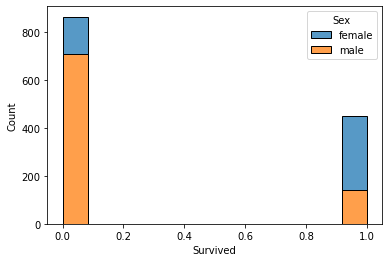

In [23]:
# here 1 represents the survived 
# 0 represents the unsurvived
# by observing the below graph we can say that the count female are survived more compared to male
sns.histplot(data=df, x="Survived", hue="Sex", multiple="stack")

<AxesSubplot:xlabel='Name', ylabel='Count'>

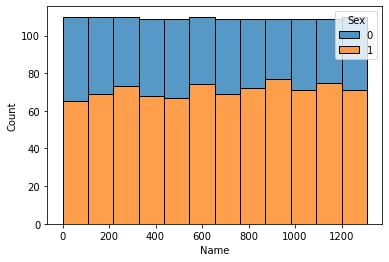

In [41]:
sns.histplot(data=df, x="Name", hue="Sex", multiple="stack")

C:\Users\gopat\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


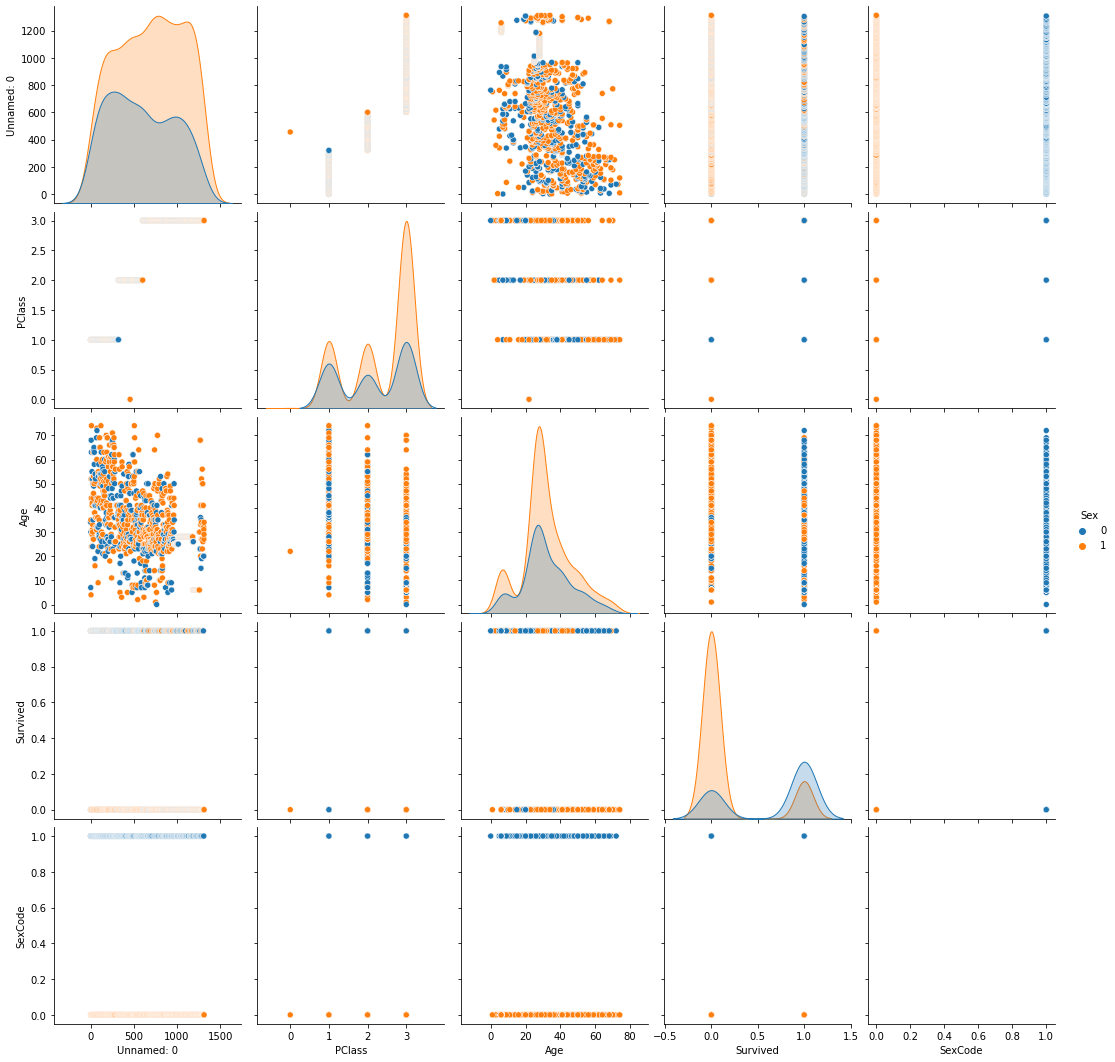

In [46]:
# by the below graph we can say that person aboarded with more than 2 siblings or spouse more likely survive
sns.pairplot(df.drop("Name", axis=1), hue="Sex", size=3, diag_kind="kde")

In [38]:
from sklearn . preprocessing import LabelEncoder
le=LabelEncoder( )
for col in df . columns:
    df [col] = le. fit_transform (df [col] )
df . head ()

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,0,21,1,34,0,1,1
1,1,24,1,7,0,0,1
2,2,25,1,35,1,0,0
3,3,26,1,30,0,0,1
4,4,23,1,4,1,1,0


<AxesSubplot:>

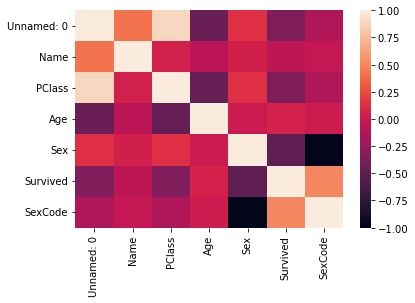

In [39]:
sns.heatmap(df.corr())

In [26]:
X = df . iloc[:, :1].values
y = df . iloc[:, -1].values
y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [34]:
#Fitting logistic regression to training set
from sklearn.linear_model import LogisticRegression
clf =LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)

In [35]:
#Confusion matrix
from sklearn. metrics import confusion_matrix
cm = confusion_matrix (y_test, y_pred)
cm

array([[156,   0],
       [107,   0]], dtype=int64)

In [37]:
# accuracy
from sklearn. metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5931558935361216

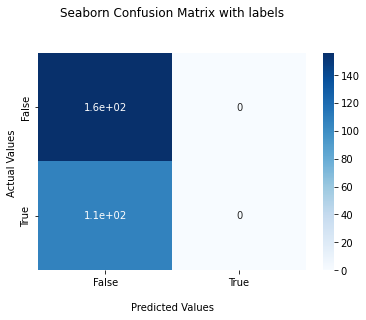

In [40]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()